In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
%matplotlib inline
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')

## **Import datasets**

In [5]:
# Import of dataset 'sentiment_values' :

sentiment = pd.read_csv('sentiment_values.csv', sep = ';', skiprows=1)  

columns = pd.read_csv('sentiment_values.csv', sep = ';', nrows = 0).columns.tolist()  

new_cols = ['col' + str(i) for i in range(len(columns), len(sentiment.columns))]     

sentiment.columns = (columns + new_cols)                             

sentiment.columns = sentiment.columns.str.strip()                                      
sentiment.head()

,hashtag,vader_min,vader_max,vader_sum,vader_avg,afinn_min,afinn_max,afinn_sum,afinn_avg,ol_min,...,ol_sum,ol_avg,ss_min,ss_max,ss_sum,ss_avg,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,melovechilicheese,0.8,0.8,0.8,0.8,NaN,NaN,NaN,NaN,0.9000,...,0.9000,0.9000,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
1,greatmusic,0.8,0.8,2.4,0.8,1.0,1.0,1.0,1.0,0.8875,...,0.8875,0.8875,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8
2,rockballad,0.7,0.7,0.7,0.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,amonamarth,0.3,0.3,0.3,0.3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,againbecauseitissogood,0.7,0.7,0.7,0.7,1.0,1.0,1.0,1.0,0.7375,...,0.7375,0.7375,1.0,1.0,1.0,1.0,0.8,0.8,0.8,0.8


---

In [6]:
# Import of dataset 'user_track_hashtag_timestamp' :
timestamp = pd.read_csv("user_track_hashtag_timestamp.csv")

timestamp = timestamp.drop(columns = ['created_at'])

track_id_NA = timestamp[timestamp['track_id'] == 'eea82c872aa5bc353480e7d0575bcde2']
track_id_NA['hashtag'].mode()

timestamp['hashtag'] = timestamp['hashtag'].fillna(track_id_NA['hashtag'].mode()[0])

timestamp['hashtag'] = timestamp['hashtag'].str.lower()

timestamp = timestamp.drop_duplicates(keep = 'first')
timestamp.head()

,user_id,track_id,hashtag
0,81496937,cd52b3e5b51da29e5893dba82a418a4b,nowplaying
1,81496937,cd52b3e5b51da29e5893dba82a418a4b,goth
2,81496937,cd52b3e5b51da29e5893dba82a418a4b,deathrock
3,81496937,cd52b3e5b51da29e5893dba82a418a4b,postpunk
4,2205686924,da3110a77b724072b08f231c9d6f7534,nowplaying


---

In [8]:
# Import of dataset 'dataset' :
dataset = pd.read_csv("dataset.csv", sep = ',', index_col = 0)

dataset = dataset.drop_duplicates(keep = 'first')

dataset = dataset.drop(dataset[dataset['track_id'] == '1kR4gIb7nGxHPI3D2ifs59'].index)
dataset.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## **Data Visualizations**

In [9]:
# Top 15 most popular tracks:
top_artists = dataset['artists'].str.split(", ", expand = True)
top_artists = top_artists.rename(columns={0: 'artists'})
top_artists = top_artists[['artists']]
top_artists['artists'] = top_artists['artists'].str.title() 
top_artists['popularity'] = dataset['popularity']
top_artists['track_name'] = dataset['track_name'].str.title()
top_artists['track_name'] = "'" + top_artists['track_name'] + "'"
top_artists = top_artists.sort_values(by = ['popularity'], ascending = False)
artists15 = pd.DataFrame(top_artists.drop_duplicates(subset = 'artists'))
artists15['y_values'] = artists15[['artists', 'track_name']].agg(', '.join, axis=1)

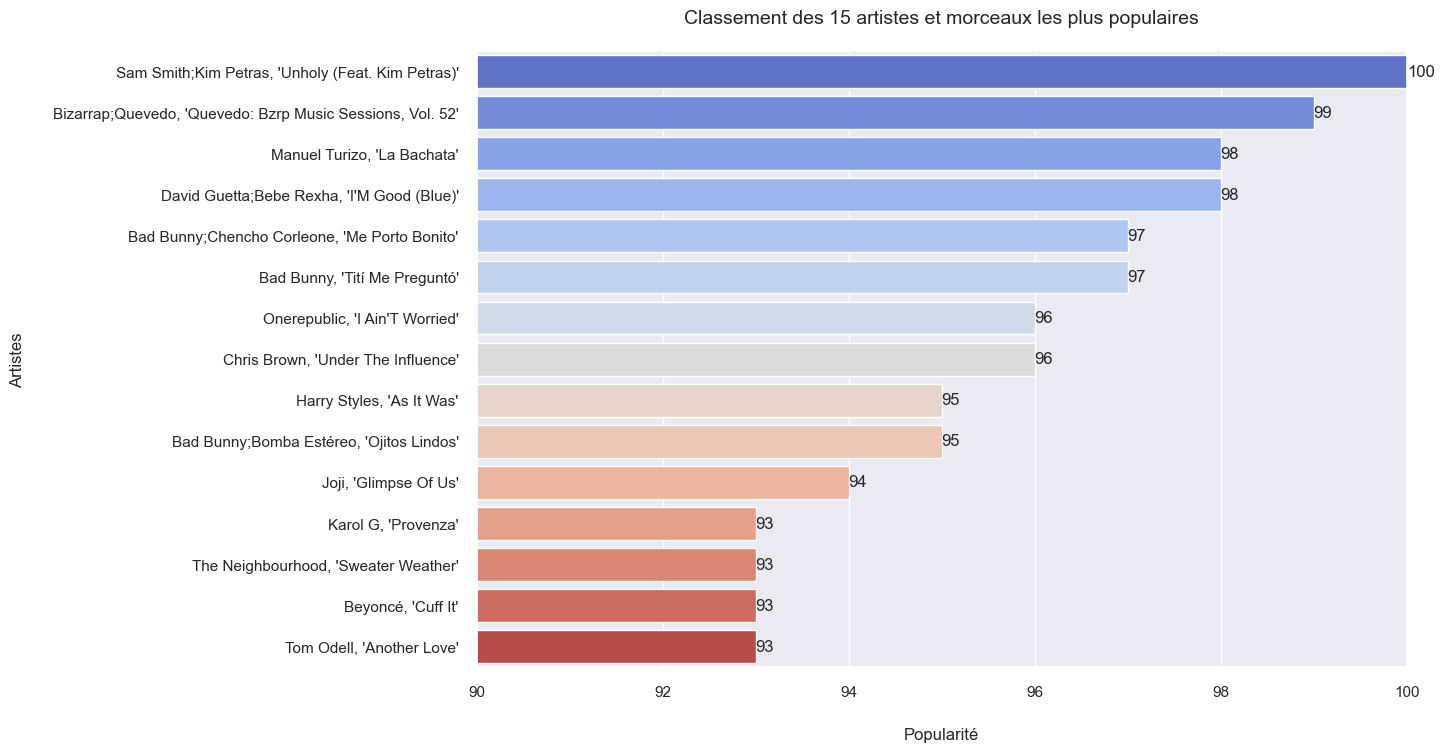

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'popularity', y = "y_values", data = artists15.iloc[:15], ax = ax, palette = 'coolwarm')
plt.xlim(90,100)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 15 - Most Popular Tracks', pad = 20, fontsize = 14)
plt.xlabel('Popularity', labelpad = 20, fontsize = 12)
plt.ylabel('Artists', labelpad = 20, fontsize = 12);

 ---

In [11]:
# Top 15 most popular artists on average:
artists15mean = pd.DataFrame(top_artists.groupby('artists')['popularity'].mean())
artists15mean = artists15mean.reset_index()
artists15mean = artists15mean.sort_values(by = 'popularity', ascending = False)

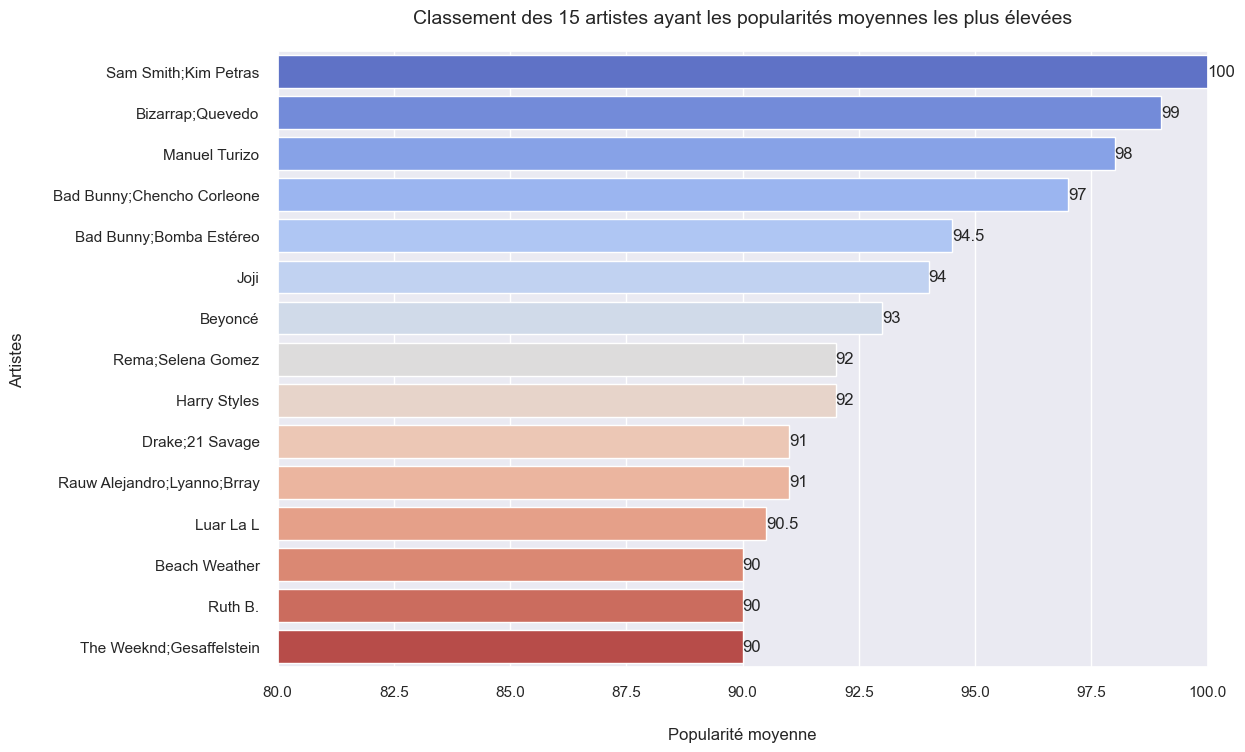

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'popularity', y = "artists", data = artists15mean.iloc[:15], ax = ax, palette = 'coolwarm')
plt.xlim(80,100)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 15 - Most Popular Artists', pad = 20, fontsize = 14)
plt.xlabel('Average Popularity', labelpad = 20, fontsize = 12)
plt.ylabel('Artists', labelpad = 20, fontsize = 12);


---

In [13]:
# Top 10 music genres according to their most popular tracks:
genres = dataset[['track_genre', 'popularity']]
genres['track_genre'] = genres['track_genre'].astype('str')
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['spanish', 'pagode', 'world-music', 'iranian', 'turkish', 'swedish', 'german',
                                                                     'malay', 'indian', 'british', 'french', 'brazil', 'forro', 'sertanejo', 'mpb'], 
                                                                    'musiques du monde'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['hardstyle', 'minimal-techno', 'detroit-techno'], 'techno'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['kids', 'anime', 'disney', 'children'], 'musiques pour enfants'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['alt-rock', 'alternative', 'grunge'], 'alternative rock'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['chicago-house', 'progressive-house', 'deep-house'], 'house'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['emo', 'grindcore', 'punk', 'punk-rock', 'goth'], 'punk'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['death-metal', 'black-metal', 'metalcore', 'heavy-metal'], 'metal'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['j-rock', 'j-idol', 'j-dance', 'j-pop', 'k-pop', 'cantopop', 'mandopop'], 
                                                                    "K-pop et musiques contemporaines d'Asie"))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['hardcore', 'edm', 'idm', 'garage'], 'dance'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['hard-rock', 'power-pop', 'psych-rock', 'rockabilly', 'rock-n-roll'], 'rock'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['industrial', 'guitar', 'sad', 'happy', 'acoustic', 'piano', 'romance', 'study',
                                                                     'party', 'breakbeat'], 'divers'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['ambient', 'new-age', 'chill', 'sleep'], "musiques d'ambiance"))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['comedy', 'pop-film', 'show-tunes'], 'chansons de films et humour'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['groove', 'gospel', 'soul'], 'soul, gospel'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['synth-pop', 'pop'], 'pop'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['folk', 'honky-tonk', 'bluegrass'], 'country'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['songwriter', 'singer-songwriter', 'indie-pop'], 'indie'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['hip-hop'], 'hip-hop'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['dubstep', 'dancehall', 'ska', 'dub'], 'reggae, dancehall'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['reggaeton', 'latin', 'latino', 'reggae', 'salsa', 'samba', 'tango'], 
                                                                    'Reggaeton et musiques latines'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['opera', 'classical'], 'musique classique'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['electronica', 'electronic', 'club'], 'electro'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['drum-and-bass'], 'drum & bass'))
genres['track_genre'] = genres['track_genre'].replace(dict.fromkeys(['r-n-b', 'rnb'], 'RnB'))
genres['track_genre'] = genres['track_genre'].str.capitalize()
genres = genres.sort_values(by = 'popularity', ascending = False)
top_genres = genres.drop_duplicates(subset = 'track_genre', keep = 'first')

In [14]:
genres

,track_genre,popularity
81051,Pop,100
20001,Dance,100
51664,Hip-hop,99
68303,Reggaeton et musiques latines,98
81210,Pop,98
...,...,...
85249,Punk,0
30847,Dance,0
85247,Punk,0
85246,Punk,0


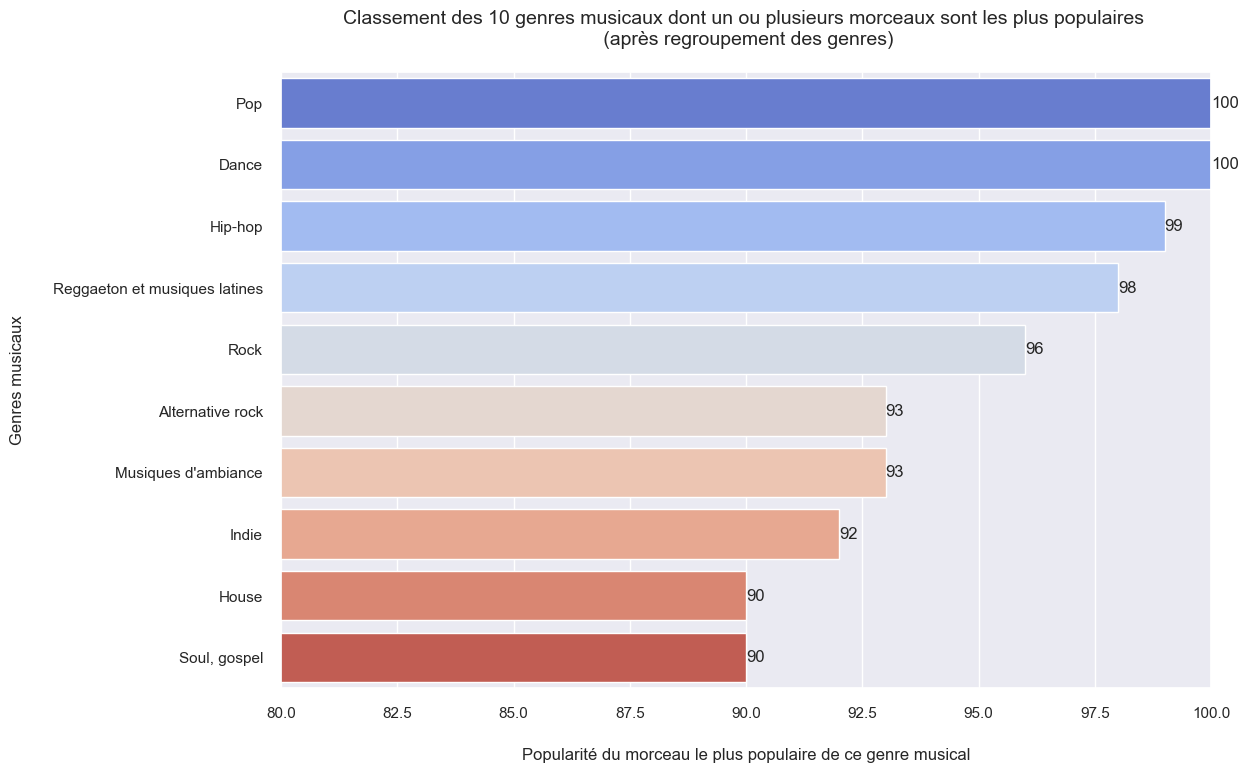

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'popularity', y = "track_genre", data = top_genres.iloc[0:11][-(top_genres.track_genre == 'Divers')], ax = ax, palette = 'coolwarm')
plt.xlim(80,100)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 10 - Music Genres', 
          pad = 20, fontsize = 14)
plt.xlabel("Popularity of genre's most popular track", labelpad = 20, fontsize = 12)
plt.ylabel('Genre', labelpad = 20, fontsize = 12);


---

In [16]:
# Classement des 10 genres musicaux ayant les popularités moyennes les plus élevées :
genres_mean = pd.DataFrame(genres.groupby('track_genre')['popularity'].mean())
genres_mean = genres_mean.reset_index()
genres_mean['popularity'] = np.round(genres_mean['popularity'], decimals = 1)
genres_mean = genres_mean.sort_values(by = 'popularity', ascending = False)


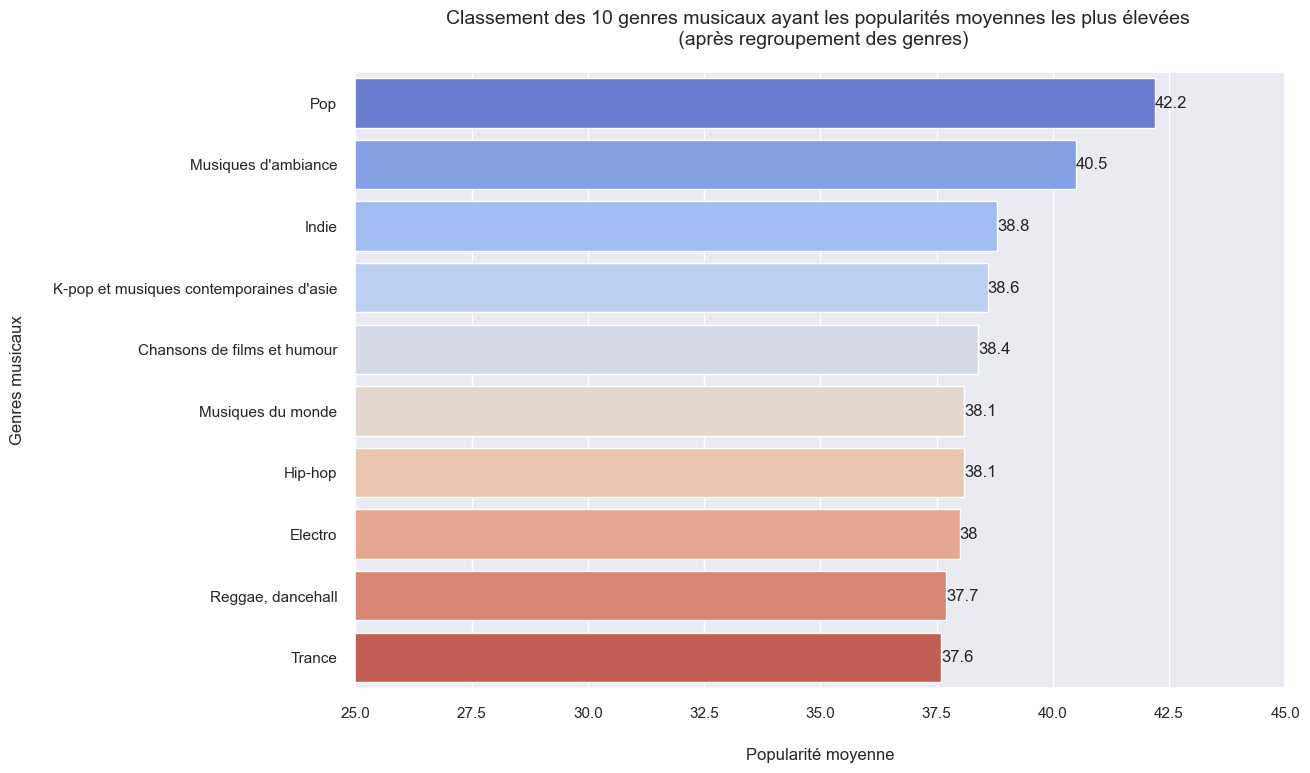

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'popularity', y = "track_genre", data = genres_mean.iloc[0:10][-(genres_mean.track_genre == 'Divers')], ax = ax, palette = 'coolwarm')
plt.xlim(25, 45)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 10 - Music Genres by Average Popularity of Genre', 
          pad = 20, fontsize = 14)
plt.xlabel('Average Popularity', labelpad = 20, fontsize = 12)
plt.ylabel('Music Genre', labelpad = 20, fontsize = 12);


---

In [18]:
# Top 10 music genre (median) :
genres_med = pd.DataFrame(genres.groupby('track_genre')['popularity'].median())
genres_med = genres_med.reset_index()
genres_med['popularity'] = np.round(genres_med['popularity'], decimals = 1)
genres_med = genres_med.sort_values(by = 'popularity', ascending = False)


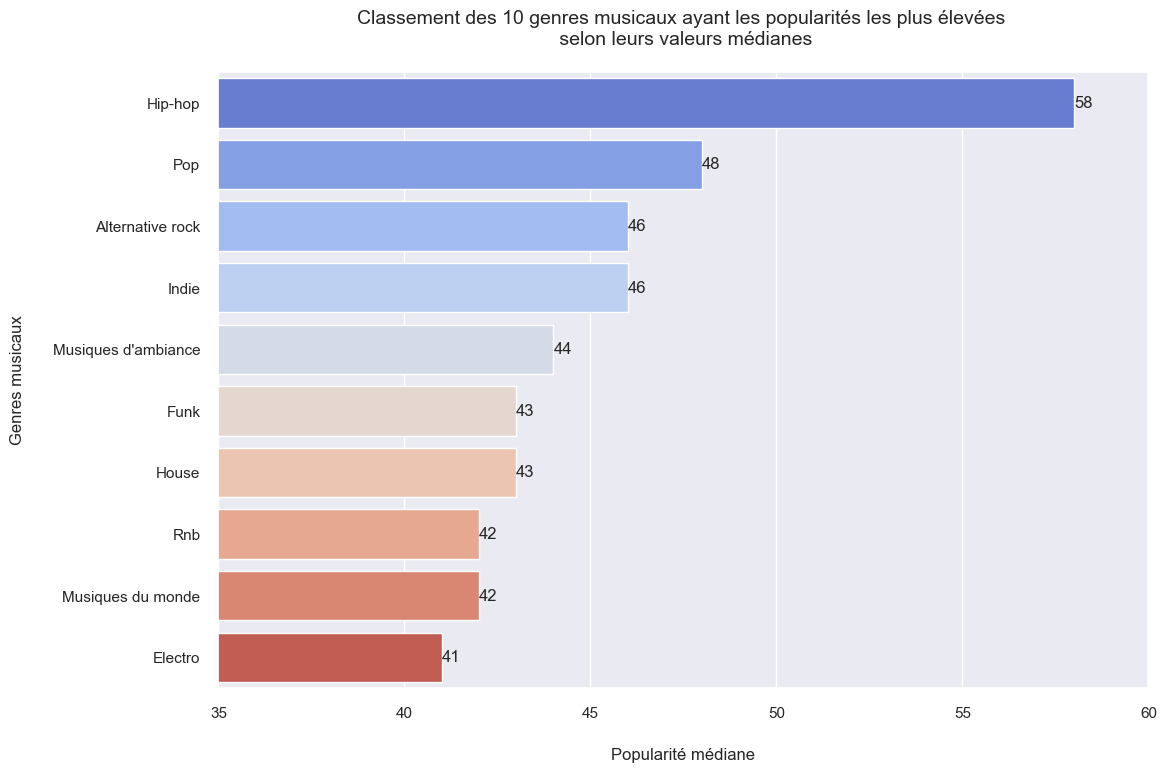

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'popularity', y = "track_genre", data = genres_med.iloc[0:10][-(genres_med.track_genre == 'Divers')], ax = ax, palette = 'coolwarm')
plt.xlim(35, 60)
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 10 - Music Genre by Popularity (median)', 
          pad = 20, fontsize = 14)
plt.xlabel('Popularity (median)', labelpad = 20, fontsize = 12)
plt.ylabel('Music Genre', labelpad = 20, fontsize = 12);


---

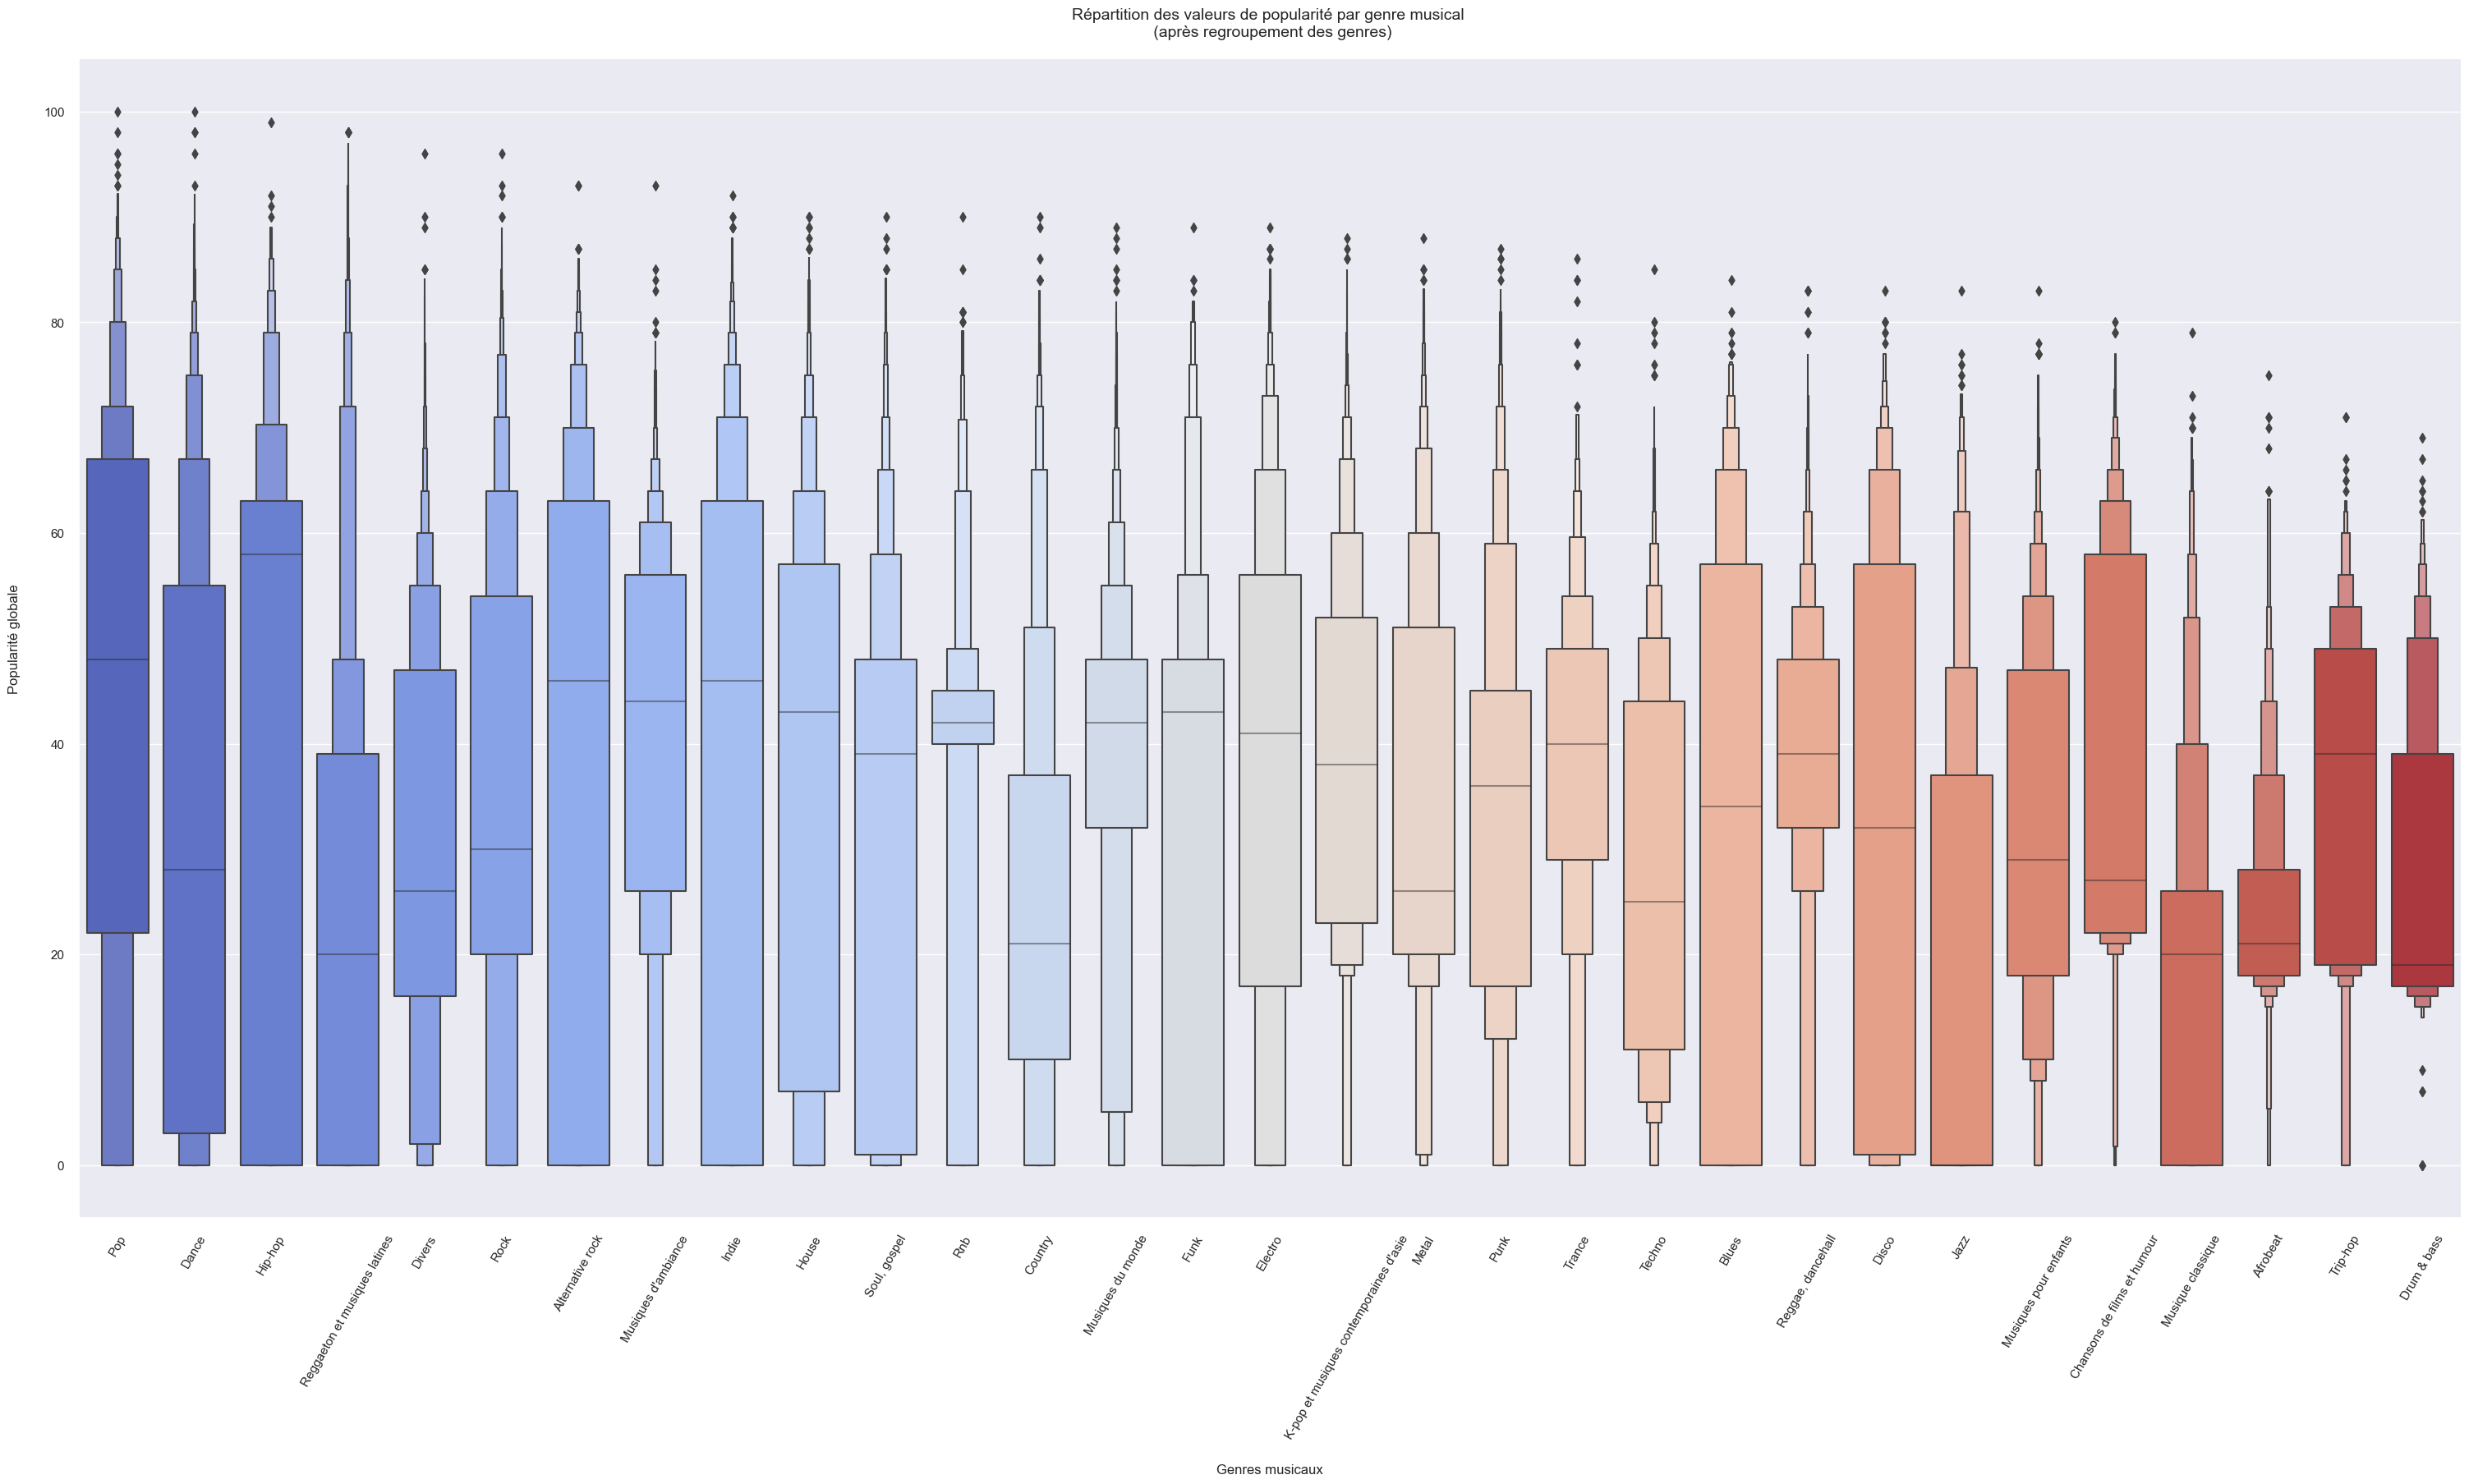

In [20]:
# Popularity spread across families of genres:
sns.catplot(x = 'track_genre', y = 'popularity', kind ='boxen', data = genres, height = 15, aspect = 2, palette = 'coolwarm')
plt.xticks(rotation = 60)
plt.title('Popularity spread across families of genres', pad = 20, fontsize = 14)
plt.xlabel('Music Genre', labelpad = 20, fontsize = 12)
plt.ylabel('Popularity', labelpad = 20, fontsize = 12)
ax.figure;

---

In [21]:
# Top 15 hashtags used the most by Twitter users while listening to music:
top_hashtags = pd.merge(timestamp['hashtag'], sentiment['hashtag'], on='hashtag')
top_hashtags['count'] = top_hashtags.groupby('hashtag')['hashtag'].transform('size')
total = len(top_hashtags)
top_hashtags['ratio'] = np.round((top_hashtags['count'] / total)*100, decimals =4)
top_hashtags = top_hashtags.drop_duplicates()
top_hashtags = top_hashtags.sort_values(by = 'count', ascending = False)


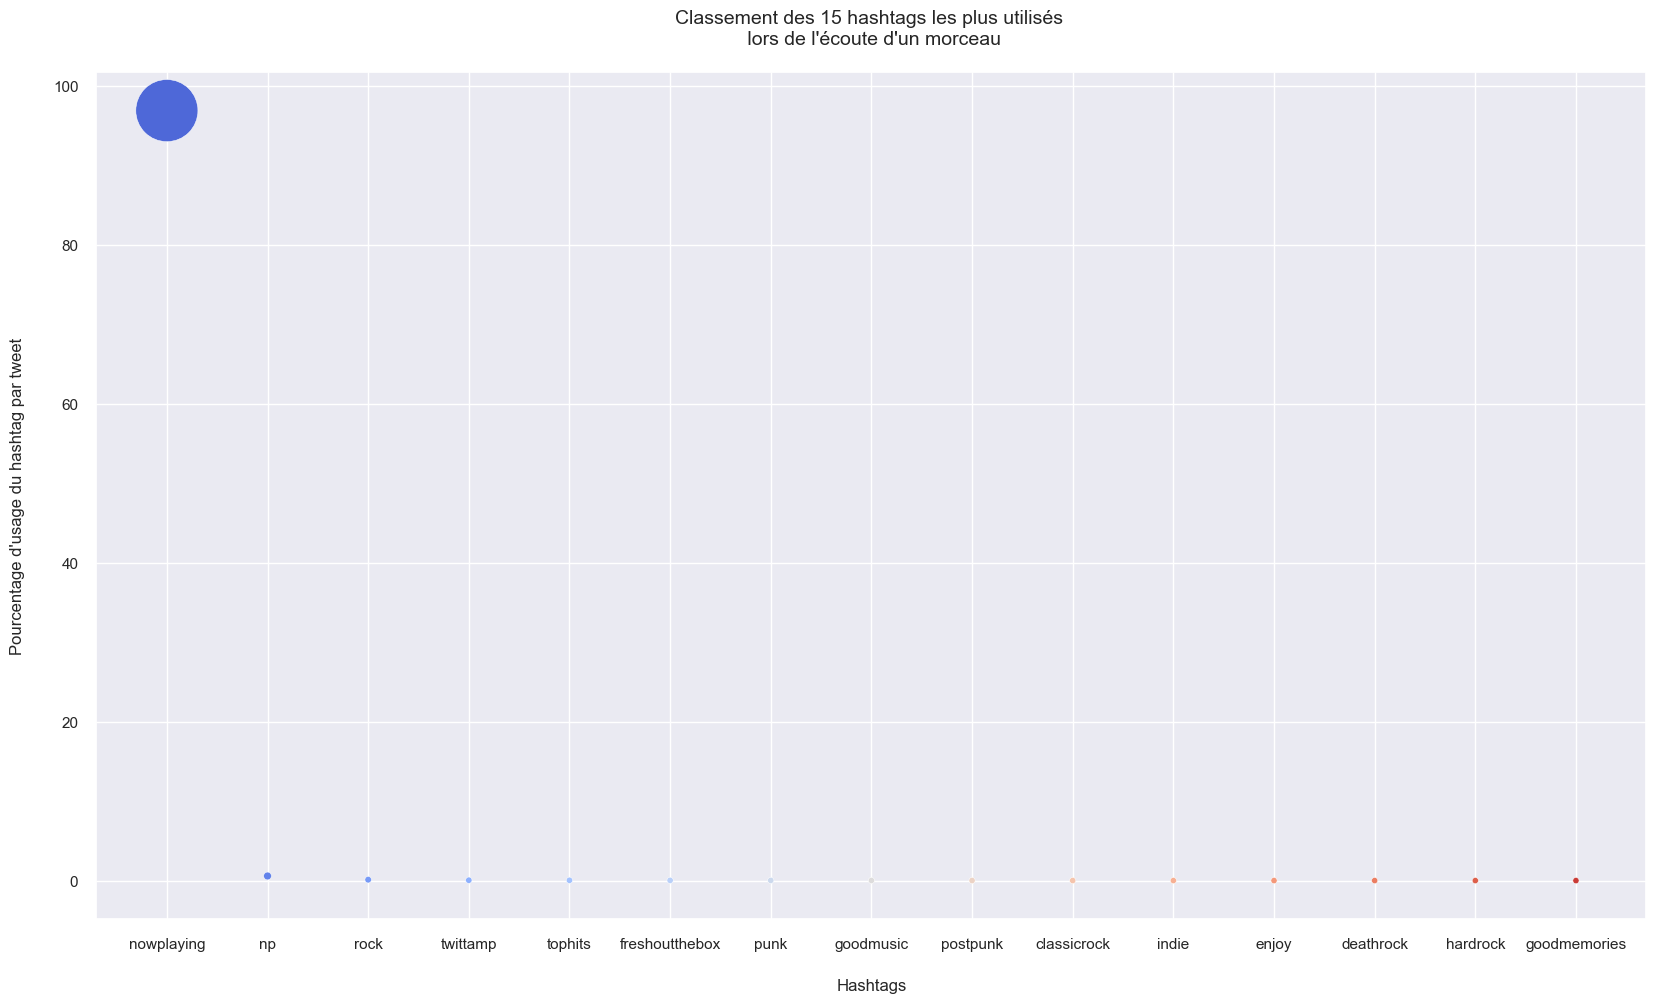

In [22]:
plt.figure(figsize = (20,11))
colors = sns.color_palette('coolwarm', len(top_hashtags[:15]))
sns.scatterplot(data = top_hashtags[:15], x = "hashtag", y = "ratio", size = "ratio", sizes = (20, 2000), legend = False, c = colors)
plt.title("Top 15 Hashtags", pad = 20, fontsize = 14)
plt.xlabel('Hashtags', labelpad = 20, fontsize = 12)
plt.ylabel("Percentage per tweet", labelpad = 20, fontsize = 12);

---

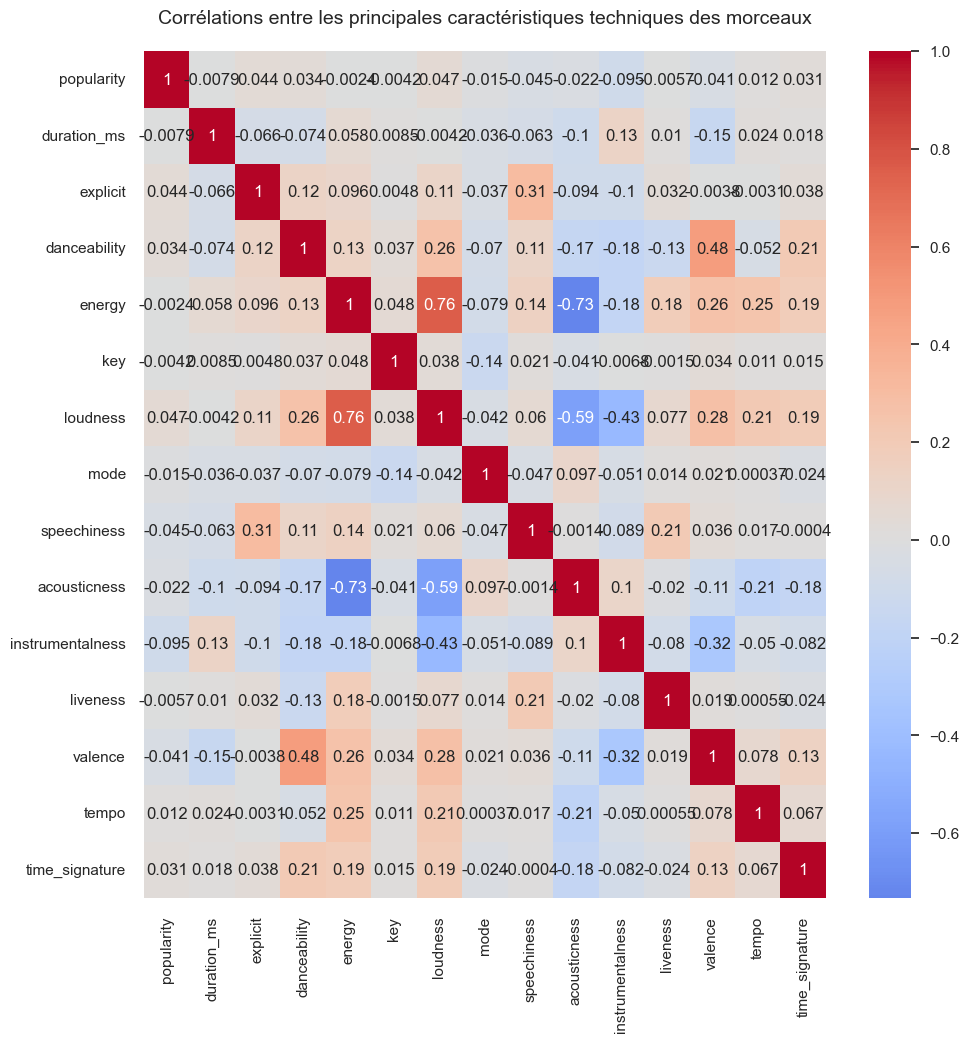

In [23]:
# Corrélations des variables numériques du dataset "dataset"
cor = dataset.corr()
plt.figure(figsize = (11,11))
sns.heatmap(cor, center = 0, annot = True, cmap = 'coolwarm')
plt.title("Correlations between the main attributes of a song", pad = 20, fontsize = 14);


---

<Figure size 1200x1200 with 0 Axes>

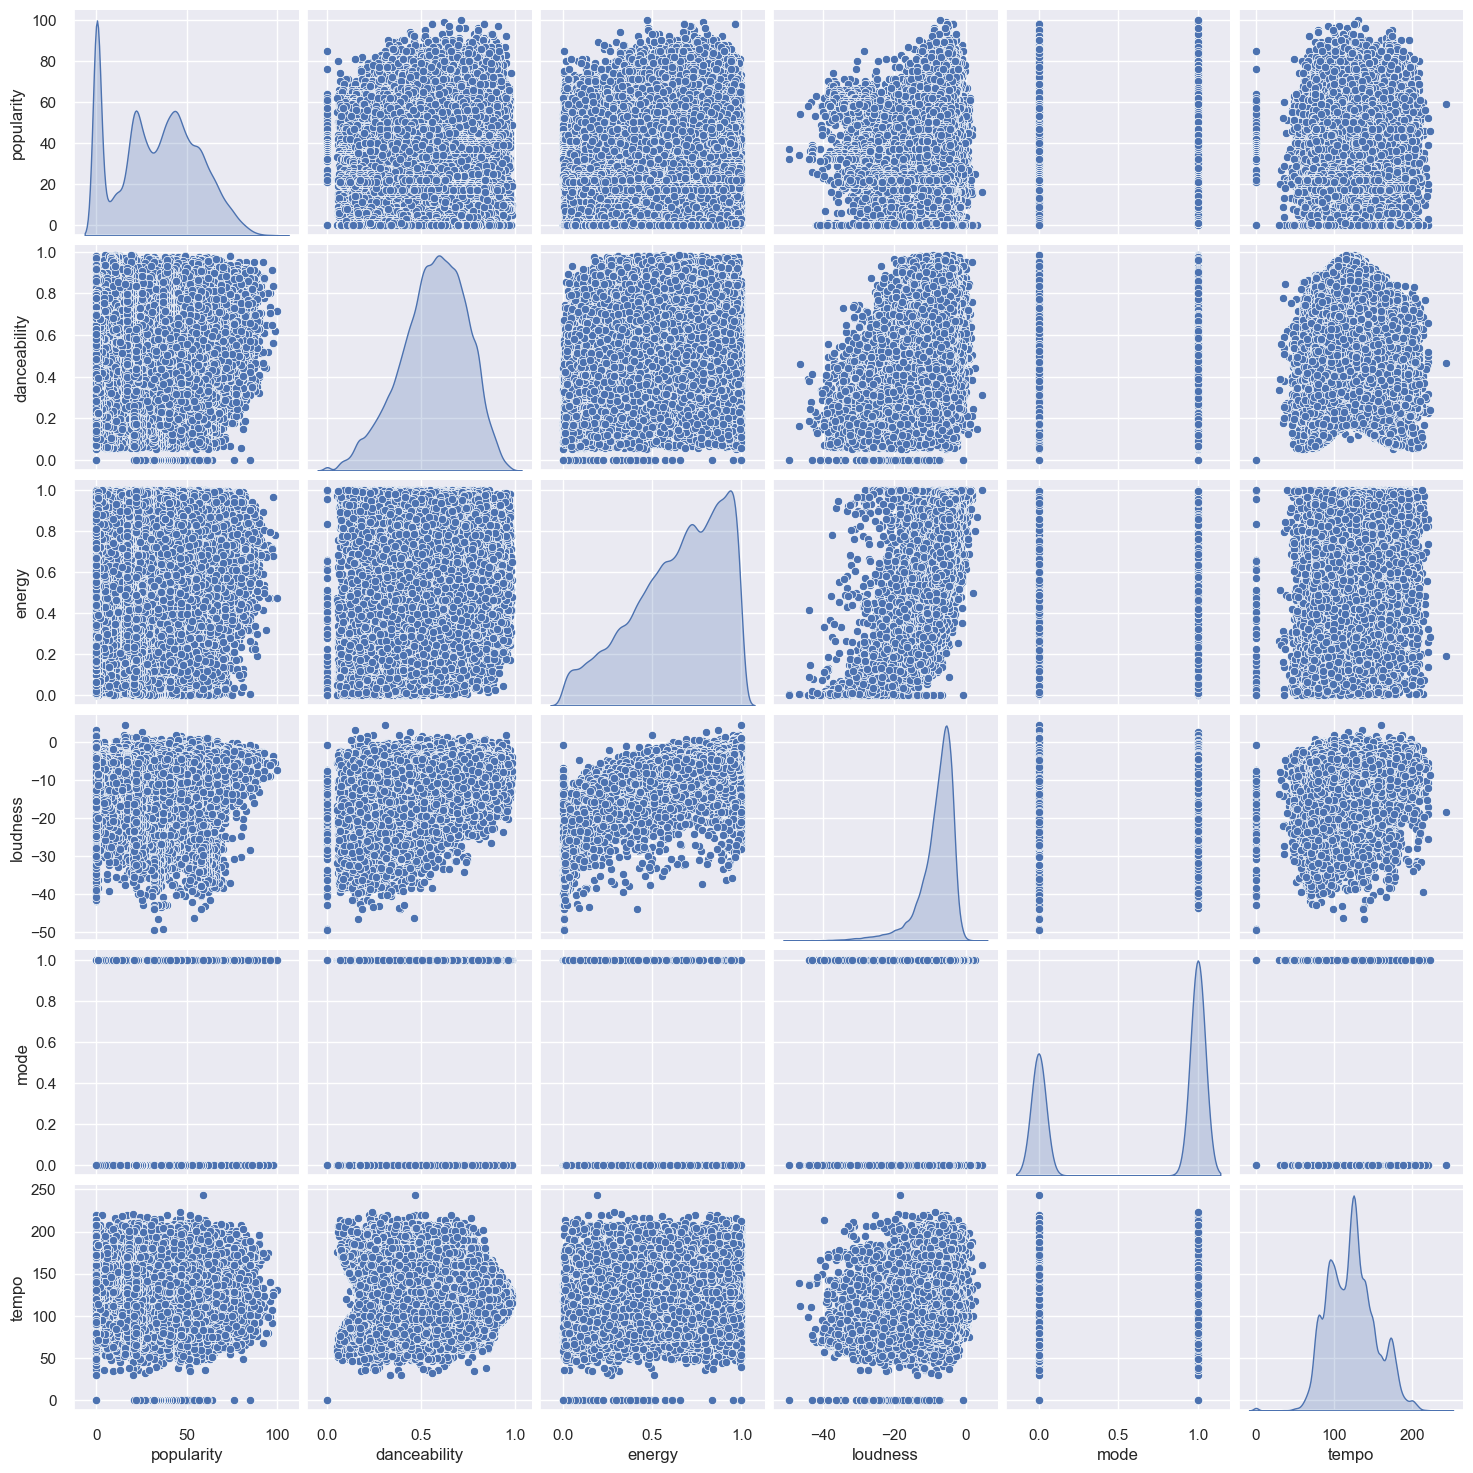

In [24]:
# Linearity of numeric variables (dataset "dataset")
plt.figure(figsize = (12,12))
sns.pairplot(dataset[['popularity', 'danceability', 'energy', 'loudness', 'mode', 'tempo']], 
             diag_kind='kde', palette = 'coolwarm');
